# This is how you can analysis the Airbnb in New York City

# Project 1 Task

Key Steps for Project Feel free to be creative with your solutions, but do follow the CRISP-DM process in finding your solutions.

1) Pick a dataset.

2) Pose at 3-5 questions related to business or real-world applications of how the data could be used.

3) Create a Jupyter Notebook, using any associated packages you'd like, to:

Prepare data:

Gather necessary data to answer your questions
Handle categorical and missing data
Provide insight into the methods you chose and why you chose them
Analyze, Model, and Visualize
Provide a clear connection between your business questions and how the data answers them. 4) Communicate your business insights:

Create a Github repository to share your code and data wrangling/modeling techniques, with a technical audience in mind
Create a blog post to share your questions and insights with a non-technical audience

The Analysis is divided into few steps

# Step-1: Business Understanding

In this step we going prepare a analysis to understand our data in below mentioned business questions

1.What are the most common room_type in New York? And what are the impact of room type on bookings?

2.What are the most common amenities available across Airbnb Boston listings? Based on property availability, how do amenities attract bookings?

3.Can we build an ML model that predicts property price based on the most popular and common features of the listings?

4.What do correlations look like between price and other features_of_interest?

5.How does property price spread over Boston — uniformly or not?

6.Can a linear regression model explain how distance from Boston downtown predicts variations in property price?

In [2]:
#import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error,confusion_matrix, classification_report
import seaborn as sns
%matplotlib inline

# Step-2: Data Understanding

In [3]:
#import data

df_listing = pd.read_csv('listings.csv')

In [5]:
df_listing.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,100,30,48,2019-11-04,0.35,2,365
1,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...",4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,73,1,386,2021-01-27,4.99,1,249
2,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,30,50,2019-12-02,0.35,1,365
3,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Midtown,40.76468,-73.98315,Private room,79,2,474,2020-09-25,3.31,1,343
4,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,75,2,118,2017-07-21,0.85,1,0


In [7]:
df_listing.shape

(37012, 16)

In [8]:
df_listing.dtypes.value_counts()

int64      7
object     6
float64    3
dtype: int64

In [10]:
df_listing.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.701200e+04,3.701200e+04,37012.000000,37012.000000,37012.000000,37012.000000,37012.000000,27489.000000,37012.000000,37012.000000
mean,2.510589e+07,9.370949e+07,40.729653,-73.950989,142.842240,23.323679,22.904112,0.867197,9.405220,130.282800
std,1.517880e+07,1.101374e+08,0.054710,0.048291,275.740987,26.441255,47.864720,1.320503,31.613257,146.635272
min,2.595000e+03,2.438000e+03,40.508680,-74.239860,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,1.103335e+07,9.643914e+06,40.690320,-73.983812,60.000000,4.000000,0.000000,0.110000,1.000000,0.000000
50%,2.485448e+07,4.023649e+07,40.725465,-73.955790,99.000000,30.000000,4.000000,0.360000,1.000000,66.000000
75%,3.982193e+07,1.529683e+08,40.762480,-73.933720,151.000000,30.000000,20.000000,1.120000,2.000000,292.000000
max,4.803978e+07,3.870718e+08,40.912140,-73.710870,10000.000000,1250.000000,753.000000,40.310000,255.000000,365.000000


In [29]:
list(df_listing.columns)

['id',
 'name',
 'host_id',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'last_review',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

In [11]:
df_listing.isnull().sum()

id                                   0
name                                13
host_id                              0
host_name                           18
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       9523
reviews_per_month                 9523
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [12]:
df_listing = df_listing.dropna(subset=['name','host_name'],axis=0)

In [13]:
df_listing.isnull().sum()

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       9510
reviews_per_month                 9510
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [21]:
df_listing['neighbourhood_group'].value_counts().sort_values(ascending=False)

Manhattan        16537
Brooklyn         14464
Queens            4700
Bronx              991
Staten Island      289
Name: neighbourhood_group, dtype: int64

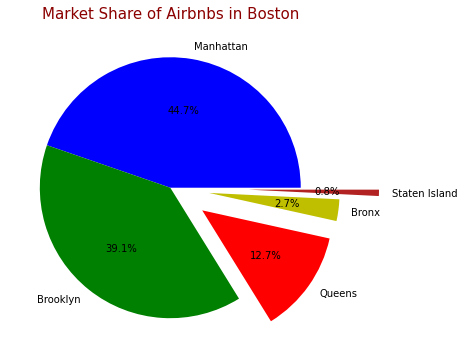

In [47]:
labels = df_listing['neighbourhood_group'].value_counts().index
colors = ['b', 'g', 'r','y','firebrick']
explode = [0,0,.3,.3,.6]
sizes = df_listing['neighbourhood_group'].value_counts().values

plt.figure(0,figsize = (7,6))
plt.pie (sizes, explode=explode ,labels = labels, colors = colors, autopct = '%1.1f%%')
plt.title ('Market Share of Airbnbs in Boston', color = 'darkred', fontsize = 15)
plt.show()


In [23]:
df_listing['room_type'].value_counts().sort_values(ascending=False)

Entire home/apt    19385
Private room       16612
Shared room          685
Hotel room           299
Name: room_type, dtype: int64

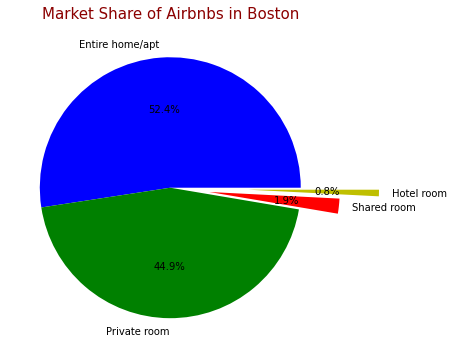

In [59]:
labels = df_listing['room_type'].value_counts().index
colors = ['b', 'g', 'r','y']
explode = [0,0,.3,.6]
sizes = df_listing['room_type'].value_counts().values

plt.figure(0,figsize = (7,6))
plt.pie (sizes, explode=explode ,labels = labels, colors = colors, autopct = '%1.1f%%')
plt.title ('Market Share of Airbnbs in Boston', color = 'darkred', fontsize = 15)
plt.show()


In [75]:
df_listing.groupby(['neighbourhood_group','room_type']).agg({'id':'count'})

id
neighbourhood_group room_type             
Bronx               Entire home/apt    368
                    Hotel room           1
                    Private room       592
                    Shared room         30
Brooklyn            Entire home/apt   7204
                    Hotel room          17
                    Private room      7013
                    Shared room        230
Manhattan           Entire home/apt  10005
                    Hotel room         272
                    Private room      5968
                    Shared room        292
Queens              Entire home/apt   1661
                    Hotel room           9
                    Private room      2900
                    Shared room        130
Staten Island       Entire home/apt    147
                    Private room       139
                    Shared room          3

In [87]:
df_listing.groupby(['room_type'])['price'].mean()

room_type
Entire home/apt    191.442559
Hotel room         228.568562
Private room        86.331688
Shared room        100.948905
Name: price, dtype: float64

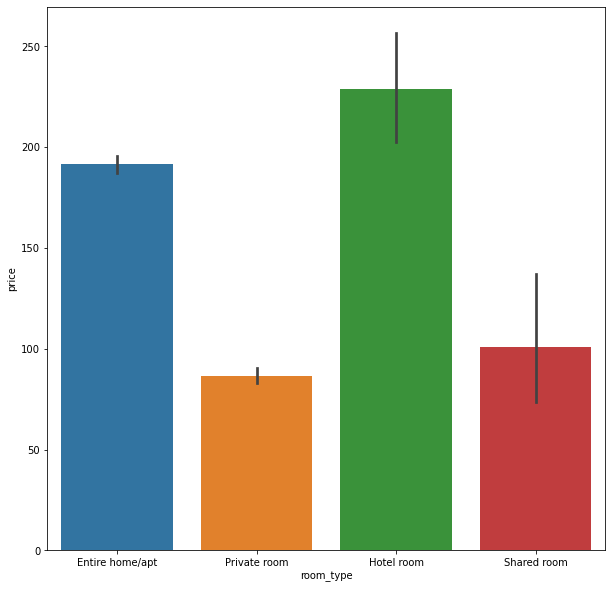

In [91]:
fig= plt.figure(figsize=(10,10))
sns.barplot(x='room_type', y = 'price', data = df_listing)

In [97]:
df_listing.groupby(['neighbourhood_group','room_type'])['price'].mean()

neighbourhood_group  room_type      
Bronx                Entire home/apt    139.649457
                     Hotel room           0.000000
                     Private room        67.925676
                     Shared room         40.533333
Brooklyn             Entire home/apt    168.749584
                     Hotel room         167.529412
                     Private room        70.052474
                     Shared room         54.495652
Manhattan            Entire home/apt    215.718041
                     Hotel room         237.055147
                     Private room       117.761562
                     Shared room        143.393836
Queens               Entire home/apt    159.006623
                     Hotel room         112.777778
                     Private room        65.572414
                     Shared room        102.584615
Staten Island        Entire home/apt    147.496599
                     Private room        69.719424
                     Shared room         64.3

In [118]:
df_listing.groupby(['name','room_type','neighbourhood_group'])['price'].mean().sort_values(ascending=False).head(20)

name                                                room_type        neighbourhood_group
Puerto Plata                                        Entire home/apt  Queens                 10000.0
~New jersey loft                                    Shared room      Manhattan              10000.0
The Allen Hotel, Deluxe Penthouse King Suite        Private room     Manhattan              10000.0
Delightful condo                                    Entire home/apt  Queens                 10000.0
Chambers Hotel, Chambers Hotel Queen - ADA          Private room     Manhattan              10000.0
1-BR Lincoln Center                                 Entire home/apt  Manhattan              10000.0
2br - The Heart of NYC: Manhattans Lower East Side  Entire home/apt  Manhattan               9999.0
Redford Queen                                       Private room     Manhattan               9999.0
Spanish Harlem Apt                                  Entire home/apt  Manhattan               9999.0
Redford Dou

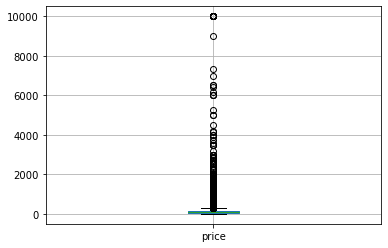

In [120]:
df_listing.boxplot(column = ['price'])

In [122]:
df_listing.loc[df_listing['price']>1500]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
323,174966,Luxury 2Bed/2.5Bath Central Park View,836168,Henry,Manhattan,Upper West Side,40.77350,-73.98697,Entire home/apt,2500,30,26,2016-01-20,0.23,10,364
454,256049,│ ♛ │SOLOWIHE HOUSE | HOUSE RENTAL,1177497,Jesse,Brooklyn,Clinton Hill,40.69064,-73.96757,Entire home/apt,4500,1,15,2018-09-03,0.18,10,365
979,664047,Lux 2Bed/2.5Bath Central Park Views,836168,Henry,Manhattan,Upper West Side,40.77516,-73.98573,Entire home/apt,2500,30,59,2016-01-28,0.58,10,364
1128,781946,Room 15m. From Times Square(3 1/2bed 1bathroom,1982425,Nya,Manhattan,Hell's Kitchen,40.75710,-73.99264,Private room,6000,7,7,2018-09-02,0.08,3,0
1309,893413,Architecturally Stunning Former Synagogue!,4751930,Martin,Manhattan,East Village,40.72668,-73.98179,Entire home/apt,2536,30,26,2021-01-03,0.34,1,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35517,46922095,New Year's Eve Private 1 Floor-7 Rooms in TS,340038896,Millennium Premier,Manhattan,Theater District,40.75668,-73.98404,Private room,3000,1,1,2021-01-01,0.86,8,0
35679,47047419,Largest Townhouse in NYC***** STAR everything,380290574,Karen,Manhattan,Upper East Side,40.77585,-73.95554,Entire home/apt,1899,3,0,NaN,NaN,1,320
36204,47421177,Loft at the Flatiron,109270187,Jon,Manhattan,Flatiron District,40.74275,-73.98952,Entire home/apt,1800,1,1,2021-01-23,1.00,1,340
36384,47596675,Spacious 4 bedroom apartment in prime Greenpoint,36086910,Matilda,Brooklyn,Greenpoint,40.72144,-73.94420,Entire home/apt,4200,30,0,NaN,NaN,1,173


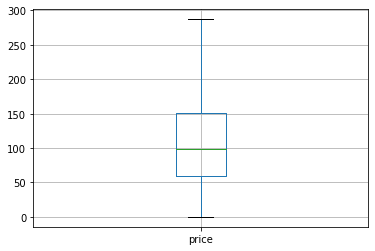

In [127]:
df_listing.boxplot(column = ['price'], showfliers = False)

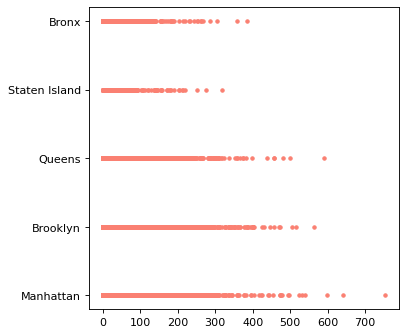

In [137]:
plt.figure(figsize=(5, 5), dpi=80)
plt.scatter(df_listing['number_of_reviews'], df_listing['neighbourhood_group'], c = 'salmon', marker = ".")
plt.show()

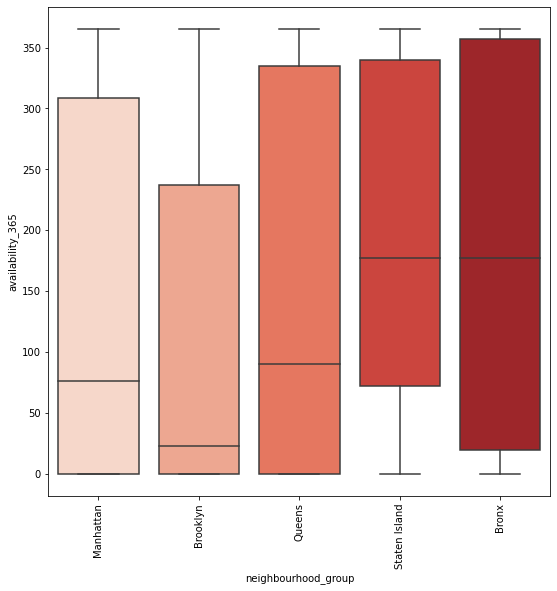

In [139]:
plt.figure(figsize = (9,9))
plt.xticks(rotation=90)
ax = sns.boxplot(data=df_listing, x = 'neighbourhood_group', y = 'availability_365', palette = 'Reds')

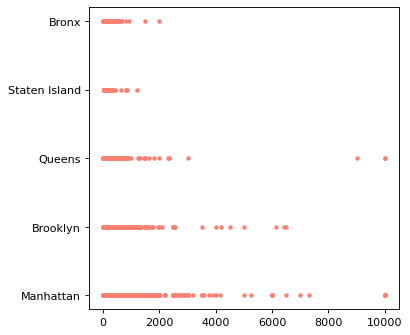

In [141]:
plt.figure(figsize=(5, 5), dpi=80)
plt.scatter(df_listing['price'], df_listing['neighbourhood_group'], c = 'salmon', marker = ".")
plt.show()

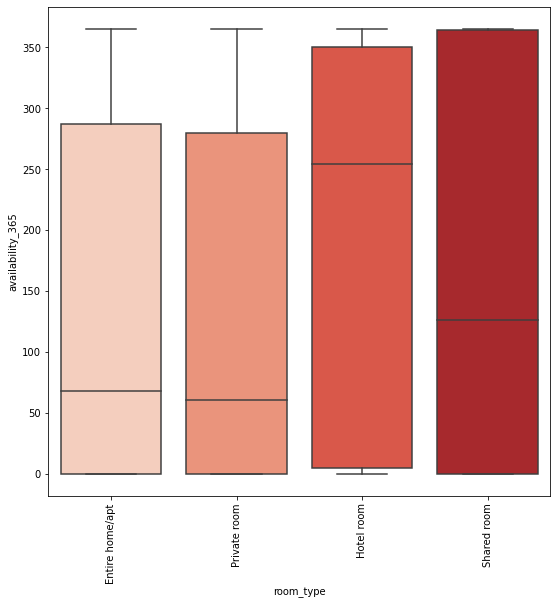

In [140]:
plt.figure(figsize = (9,9))
plt.xticks(rotation=90)
ax = sns.boxplot(data=df_listing, x = 'room_type', y = 'availability_365', palette = 'Reds')

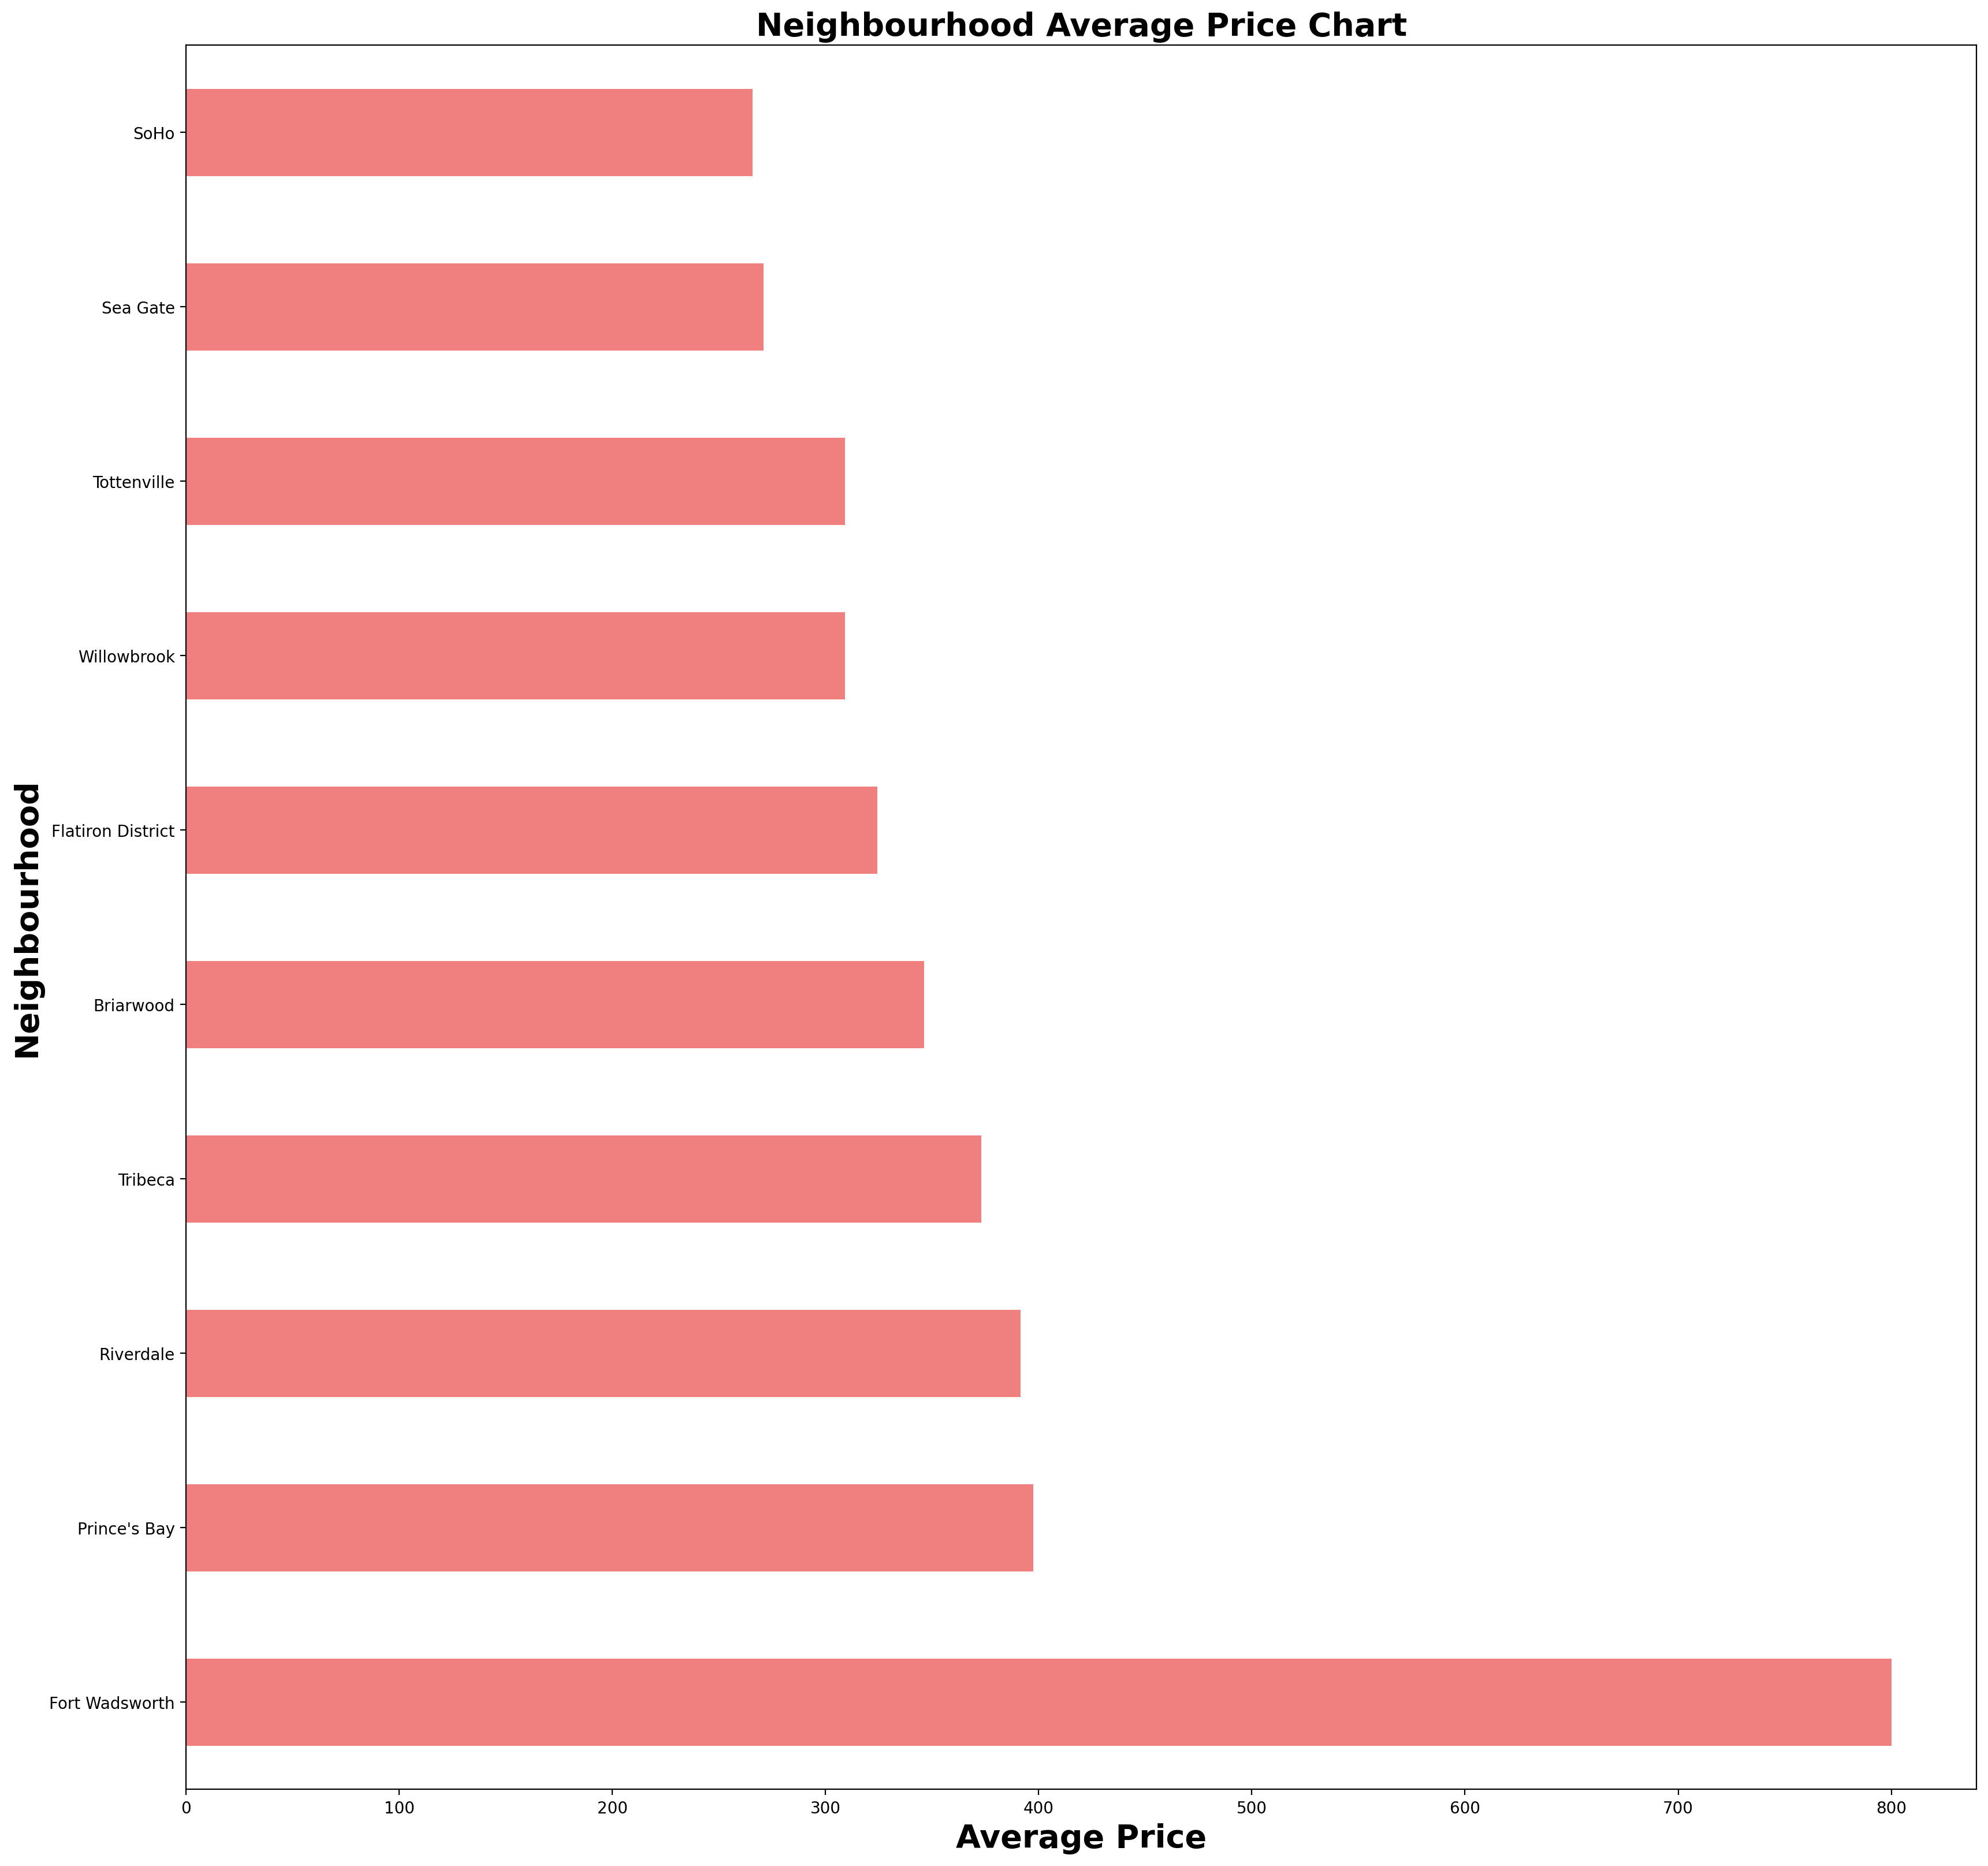

In [152]:
price_per_neighbourhood = df_listing.groupby(['neighbourhood']).price.mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(20,20), dpi=200);
price_per_neighbourhood.plot(kind='barh', color='lightcoral');
plt.xlabel('Average Price', weight='bold', size =20)
plt.ylabel('Neighbourhood', weight = 'bold', size =20)
plt.title('Neighbourhood Average Price Chart', weight ='bold', size = 20);

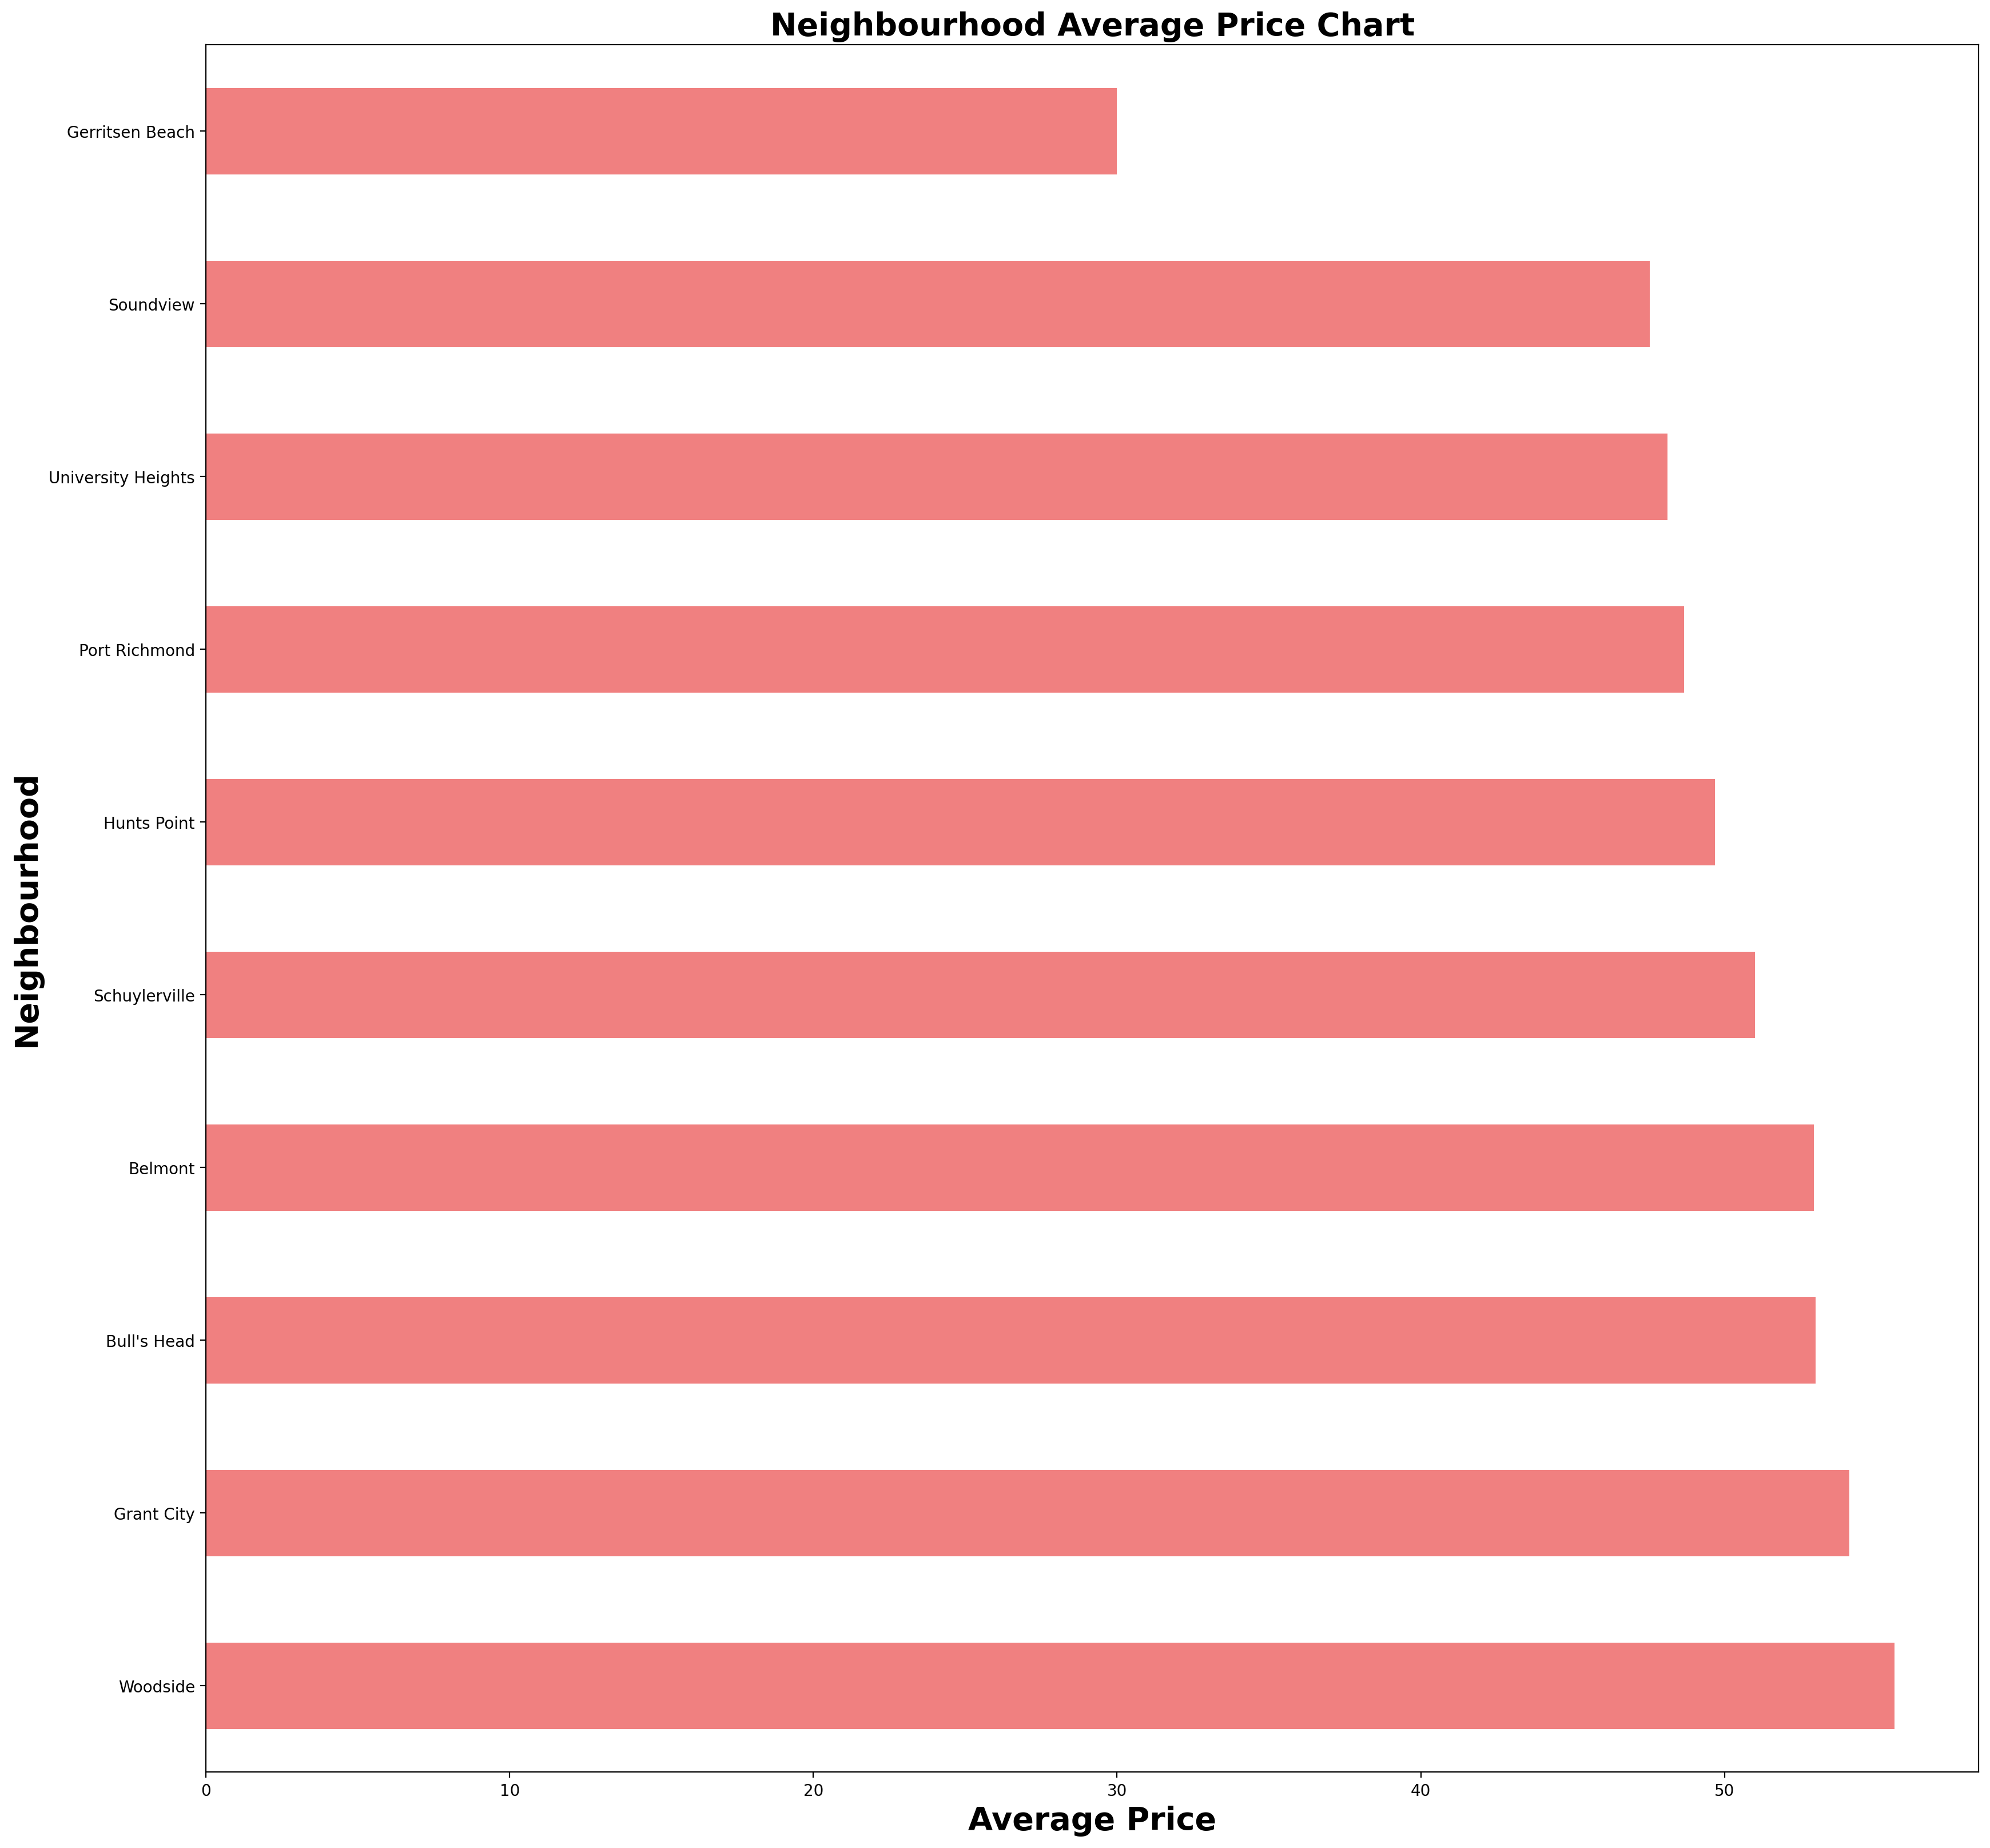

In [153]:
price_per_neighbourhood = df_listing.groupby(['neighbourhood']).price.mean().sort_values(ascending=False).tail(10)
plt.figure(figsize=(20,20), dpi=200);
price_per_neighbourhood.plot(kind='barh', color='lightcoral');
plt.xlabel('Average Price', weight='bold', size =20)
plt.ylabel('Neighbourhood', weight = 'bold', size =20)
plt.title('Neighbourhood Average Price Chart', weight ='bold', size = 20);